# Assignment 2: Exploring sources of bias in data
## Bias in data, demystified

**All datasets have limitations. Any of these limitations can be a potential source of bias.** In the context of data, a "bias" is really just a divergence between what a dataset is supposed to capture about the world--according to the *dataset designer's intention*, or according to the *end-user's expectations*--and what's actually represented in the data. 

So biases in data are often highly *contextual*, which can make them subtle and hard to spot. Similarly, it's hard to predict ahead of time what the *consequences* of those biases might be, because it depends on what the data is being used for.

Nevertheless some sources of "bias" in data show up over and over again. Some of these are:
- **duplicated data:** the same data shows up multiple times
- **incomplete data:** some data is missing from the dataset
- **misleading data:** it looks like a piece of data means one thing, but it actually means something different
- **unrepresentative data:** the dataset doesn't represent the population it's gathered from OR the population it's intended to model


Any of these sources of bias, unless their properly documented (with a data statement, etc) can have unintended consequences: they cause a researcher who is using the data to reach incorrect conclusions, or cause a machine learning model that is trained on that dataset to make classification errors.

The nature or scale of these consequences can be hard to predict. That's why any time you prepare to use data that you didn't gather yourself, it pays to spend some time exploring the dataset, identifying limitations, and thinking critically about how these limitations might affect your analysis or your machine learning model.

## Introduction to Assignment 2
For this assignment, you'll be working with the Wikipedia Talk Corpus. You have already created a data statement for this dataset in class, so you're an 'expert' on it compared to most people!

**In assignment 1, you learned how to process and analyze a dataset created by someone else.** In that assignment, we took the dataset at face value: we assumed that there were no major errors, no missing data, nothing that would skew our results. We assumed that the dataset really did accurately capture all the bike and pedestrian traffic on the Burke-Gilman trail over the specified period of time.

**In assignment 2, we'll also be analyzing a dataset created by someone else,** but this time *we won't assume that the data is complete and correct.* Instead, we will try to identify ways in which the data might be WRONG, and form hypotheses about how the limitations we discover might make it an unsuitable, or at least a potentially problematic, training dataset for a general-purpose hostile speech detector. 

**There are 16 questions in this assignment, across three sections:**

***In part 1 of this assignment,*** you will load one type of Wikipedia Talk Corpus data--the demographics of the crowdworkers who labelled the comments--into your copy of this Jupyter Notebook, and we will walk through a series of data processing steps, with the goal of ending up with a complete and accurate set of data about all of those crowdworkers. In the process, we will discover and discuss several limitations of the dataset.

***In part 2 of this assignment,*** you will generate some basic descriptive statistics about the demographics of the crowdworkers described in that dataset. If you are comfortable in Python, you can perform that analysis in this Notebook. If you aren't as comfortable in Python (yet!), you can perform the analysis in Google Sheets (just be sure to link to that Google Sheet from this notebook, and set the permissions so that your instructors can view it!). 

***In part 3 of this assignment,*** you will answer some additional research questions about this dataset. Some of these questions can be answered without writing additional code or analyzing additional data; other questions will require you to combine this dataset another dataset in the corpus. You will have the option to choose whether you want to answer code or no-code questions.

Whether you choose code or no-code question for part 3, you will need to write your responses to the question within this notebook, and submit a link to this notebook for grading.

Part 3 also contains some optional "challenge" questions that you can investigate if you want to (hint: any one of these challenge questions could be the focus of a final course project).


***Note:*** *Since the purpose of this class is to get you comfortable thinking critically (like a researcher), rather than programming perfectly, you won't be graded on your code. You'll be graded on how well you DOCUMENT YOUR PROCESS and REFLECT on the implications of your findings. If you still aren't sure what that means, ask your instructor or TA!*

## Part 1: Cleaning and analyzing the annotator demographic data

For the first part of this assignment, we're going to prepare one set of Wikipedia Talk data--the annotator demographics files--for analysis. In the process we'll perform a few "sanity checks" to make sure we understand what the data means, and know any limitations.

This sort of "[data wrangling](https://en.wikipedia.org/wiki/Data_wrangling)" is a critical, if sometimes tedious, first step for any quantitative research project.

### 1.1 Load the data into the notebook

According to the documetation, the worker demographic data for the Wikipedia Talk Corpus is spread across three files:
- ``toxicity_worker_demographics.tsv``
- ``aggression_worker_demographics.tsv``
- ``attack_worker_demographics.tsv``

We will need to combine the data in these three files to come up with our canonical list of workers. 
**Just like working with data in the real world, you will need to retrieve the files from their source (Figshare) and transfer them into your notebook server**.

- **Toxicity dataset:** [data](https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Toxicity/4563973) (Note: this is 35Mb!), [documentation](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release#Toxicity), [questionnaire shown to crowdworkers](https://github.com/ewulczyn/wiki-detox/blob/master/src/modeling/toxicity_question.png)
- **Aggression dataset:** [data](https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Aggression/4267550) (Note: this is 74Mb!), [documentation](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release#Aggression), [questionnaire shown to crowdworkers](https://github.com/ewulczyn/wiki-detox/blob/master/src/modeling/aggression_question.png)
- **Personal attacks dataset:** [data](https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Personal_Attacks/4054689) (this is only 92k), [documentation](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release#Personal_Attacksv), [questionnaire shown to crowdworkers](https://github.com/ewulczyn/wiki-detox/blob/master/src/modeling/attack_question.png)

First we'll load each of the annotator datafiles into our Notebook and save them into data structures that's easy to work with. In this case, I'm choosing to save each of these files as a list-of-dictionaries, since that's fairly standard, and it makes it easy to check your work as you go.

By the way: ``.tsv`` stands for "tab-separated values", and it means that this file is organized into rows and columns, like a spreadsheet, and the data values for each column are separated by "tab" characters.

In [1]:
#for debugging puproses only
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/usr/local/bin/python3.7
3.7.2 (v3.7.2:9a3ffc0492, Dec 24 2018, 02:44:43) 
[Clang 6.0 (clang-600.0.57)]
sys.version_info(major=3, minor=7, micro=2, releaselevel='final', serial=0)


In [2]:
#import the csv module, a little code toolkit for working with spreadsheet-style data files
import csv

The function below will load in a tab-separated (.tsv) file and convert it into a lists-of-dictionaries. 

If you don't have much experience with Python, this (and some of the other code in this notebook) might be hard to understand. That's okay! For now, it's most important that you know what it does.

If you have a ***lot*** of experience with Python, the code in this notebook might seem really, really primitive. That's also okay! Remember: in this course we're primarily interested in data, not code. Code is just one of the many tools we use to ask and answer questions about data.

In [3]:
def prepare_datasets(file_path):
    """ 
    Accepts: path to a tab-separated plaintext file
    Returns: a list containing a dictionary for every row in the file, 
        with the file column headers as keys
    """
    
    with open(file_path) as infile:
        reader = csv.DictReader(infile, delimiter='\t')
        list_of_dicts = [dict(r) for r in reader]
        
    return list_of_dicts

### 1.2 Identifying duplicated datafiles
Let's load our three .tsv files into Python and store them as three variables with relevant names, so that we know which is which. 

Once we've created these three lists-of-dicts, we will do two things to check our work so far: 
- we will print the first annotator's demographic data (list index ``[0]``) so that we know what the format looks like
- we will print the length of each list (the ``len`` function), to see how many rows is in each file. Each row should correspond to one crowdworker/annotator.

***Note:*** for the cell below to run, your version of these datafiles and folders will need have the same names as the ones below, and your version of this Notebook will need to be stored in the same directory as the three folders that hold the datafiles.

In [4]:
#load the data from the flat files into three lists-of-dictionaries
toxicity_annotators = prepare_datasets("annotationdatasets/toxicity_worker_demographics.tsv")
print(toxicity_annotators[0])
print(len(toxicity_annotators))

attack_annotators = prepare_datasets("annotationdatasets/attack_worker_demographics.tsv")
print(attack_annotators[0])
print(len(attack_annotators))

aggression_annotators = prepare_datasets("annotationdatasets/attack_worker_demographics.tsv")
print(aggression_annotators[0])
print(len(aggression_annotators))



{'worker_id': '85', 'gender': 'female', 'english_first_language': '0', 'age_group': '18-30', 'education': 'bachelors'}
3591
{'worker_id': '833', 'gender': 'female', 'english_first_language': '0', 'age_group': '45-60', 'education': 'bachelors'}
2190
{'worker_id': '833', 'gender': 'female', 'english_first_language': '0', 'age_group': '45-60', 'education': 'bachelors'}
2190


Interesting! This tells us a few things that we didn't know before:
1. it looks like the demographic data matches what's listed in [the schema](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release#Schema_for_{attack/aggression/toxicity}_worker_demographics.tsv), which is great!
2. it looks like the "toxicity" dataset was annotated by a lot more people (3,591) than the "attack" or "aggression" datasets (2,190)
3. ``aggression_worker_demographics.tsv`` and ``attack_worker_demographics.tsv`` seem to contain the same number of workers, and the worker at the beginning of each list has the same ID and demographic data.

Let's dig a little deeper into finding #3. Are the ***last*** entries in both of these lists also identical?

In [5]:
print(attack_annotators[-1]) # "-1" tells Python to find the last item in any list
print(aggression_annotators[-1])


{'worker_id': '3876', 'gender': 'female', 'english_first_language': '1', 'age_group': '30-45', 'education': 'bachelors'}
{'worker_id': '3876', 'gender': 'female', 'english_first_language': '1', 'age_group': '30-45', 'education': 'bachelors'}


Yes, the last rows in these two lists are also identical! 

And in fact if you had opened the two lists in a text editor or spreadsheet program, you would find that the *aggression and attack .tsv files contain exactly the same data.* By the way, it doesn't say anywhere in the dataset documentation that these two files are identical!

That brings us to our first lesson about bias: watch out for duplicate data! 

Consider: *What would have happened if we had just combined these three files and then analyzed the worker demographics? What mistaken conclusions might we have drawn from that?*

>Combining all three datasets would lead to increased file sizes making programs run longer than it needs to be. If we were to compare demographic data of the annotators, then we would see a greater representation of those that are duplicated.
 
Fortunately, now that we know that there is duplicate data we can work around it. Since two files are identical, we only need to use one of them. So from now on, we will ignore ``aggression_annotators`` entirely. 

Since we want to remember that ``attack_annotators`` really refers to both "attack" and "aggression" annotators, we can just rename the variable we're using to store that dataset.

In [6]:
#attack and aggrogated annotators are merged into one file
attack_aggro_annotators = attack_annotators

Okay, that looks good. Now we can continue getting our data ready for analysis--while keeping an eye out for additional duplicate data and other "gotchas"!

### 1.3 Understanding what the properties of your data really mean

Whenever you are working with data that you didn't create, it's very useful to perform some basic sanity-checking to make sure the data actually means what you think it means. 

For example, take the ``worker_id`` field in our datasets. 

The [schema](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release#Schema_for_{attack/aggression/toxicity}_worker_demographics.tsv) says that the ``worker_id`` field contains an "anonymized crowd-worker id" and that this ID is meant to join the worker demographics datafiles with the annotator comments datafiles, so that if we wanted find all of the comments that worker "85" (from above) labelled, we could find her by looking for that ID in each row of ``toxicity_annotated_comments.tsv``.

So far, so good. But since we want to combine the toxicity and attack + aggression annotator demographics data into a single dataset, we probably want to know...

1. did any of the values for ``worker_id`` appear in both datasets?
2. if so, do they correspond to the same person (or at least, a person with matching gender, age group, etc.)?

### 1.4 Checking for duplicate worker IDs

If we want to see if worker_id means the same thing across datasets, the first step is to see if any of the same worker_ids exist across the two datasets.

To check this, let's first pull all the worker IDs out of each dataset and combine them into a single list. Then we can check that list to see if it contains any duplicate values. If it does, we know that there is at least 1 value for ``worker_id`` that appears in both datasets.

**Note:** *We're assuming that there are no duplicate values for ``worker_id`` within each dataset. (There aren't, I checked). It's a pretty safe assumption though, because worker_id is intended to be a unique key that links the ``worker_demographics.tsv`` files and the ``annotated_comments.tsv`` datasets. Can you explain why it would be an issue if there were duplicate values for ``worker_id`` within an individual dataset?*

>Similar to the previous response if there were duplicated worker_id values within the same .tsv file, then it could create an overrepresentation of those duplicated demographics. But in addition, it would challenge the validity of the datasets. If the worker_id isn't unique to a single person, then our previous technique of merging both datasets would be erasing the existence of those workers who share a worker_id. The worker_id is critical for keeping track of individuals' accuracy so it becomes an issue of creating autonomy for the right individual.

In [7]:
#pull the worker ids out of the individual files into two lists
tox_w_ids = [item['worker_id'] for item in toxicity_annotators]
aa_w_ids = [item['worker_id'] for item in attack_aggro_annotators]


#create a new list to hold all the ids from both lists
all_w_ids = tox_w_ids + aa_w_ids

# #combine the two worker_id lists into the new list OLD way
# all_w_ids.extend(tox_w_ids)
# all_w_ids.extend(aa_w_ids)

In [8]:
#how many worker ids do we have, total? 
#this number should match the total count of toxicity_annotators and attack_aggro_annotators (3591 + 2190 = 5781)
print(len(all_w_ids))

5781


In [9]:
#what does our new list look like? Let's print the first five values
print(all_w_ids[0:5]) #splice splice

['85', '1617', '1394', '311', '1980']


Below is our duplicate-checker function. You pass it a list of values, and it will return "True" if it finds at least 1 duplicate value in that list. Can you figure out how it works?
>A set is a data structure that can only hold unique values. As a for loop iterates through the entire worker_id list, it adds those IDs to the set, holding iterable. If a value already exists within the set iterable, then it isn't added and the detection variable for duplicated data is set true.

In [10]:
#write a function
def determine_dupes(w_ids):
    set_of_ids = set() #empty sequence of distinct values to prevent multiple additions
    
    found_a_dupe = False #binary goes on true/false
    #for a value in list
    for w in w_ids:
        if w in set_of_ids:
            #if value in a holding list, does not add
            found_a_dupe = True
            #change binary to true
        else:
            set_of_ids.add(w)
            #add to the set

    return found_a_dupe

In [11]:
#we'll call determine_dupes to check for duplicates in the combined worker id list
has_dupes = determine_dupes(all_w_ids)

#if this prints 'True', that means we found at least one duplicate ID
print(has_dupes)

True


Hmmm... So it looks like there's at least 1 duplicate! Okay, we'll need to do some additional verification before we can decide what to do with that information. 

The next thing we'll do is check how many duplicates there are. We'll write a short script that reads through ``all_w_ids`` and every time it finds a value that appears more than once, it adds that value to a new list.

Can you figure out how the script below works?
>The cell starts with an empty list to hold identified worker_id values. Then it goes through all worker_id values in the master list to look for recurring IDs. If that particular worker_id is mentioned more than once in the dataset it's added to the length dataset.

>This for loop goes through all datasets, regardless of whether or not the worker_id has already been included in dupes list. For both instances where the worker_id is mentioned, they become included in the dupes list. This method assumes that the worker_id is mentioned once per dataset; in  aggro&attack and toxcity files. If the worker_id is duplicated by being mentioned in both, the true number of duplicated values is half the number of mentions.

In [12]:
#create an empty list to hold any duplicate worker_id values we find
dupes = []

#look through the data, if you encounter any value more than once, add it to our 'dupes' list
for w in all_w_ids:
    if all_w_ids.count(w) > 1:
        dupes.append(w)

#how many values were added to 'dupes'?        
print(len(dupes))

#how many worker_ids are present twice in the dataset?
#can you explain why we are dividing the length of "dupes" by 2 in order to answer that question?
print(len(dupes)/2)

3716
1858.0


Huh, so it looks like 1,858 of the ``worker_ids`` in our merged dataset are duplicates! That's a lot of duplication, since our list was only 5,781 rows in the first place, including these dupes! 

We will definitely need to account for these duplicates before we start analyzing worker demographics. 
- If the duplicate ``worker_id``s have different demographic metadata, we will assume they are different people with the same ID. 
- If the metadata is identical, then we know we can safely remove the duplicates
- If some metadata is identical and some is different... well, let's hope that's not the case!

### 1.5 Check for duplicate worker demographic metadata
Let's see if it's just the value for ``worker_id`` that is duplicated across the two datasets (meaning that the these duplicate ids correspond to different workers with different demographics), or if ``worker_id`` really corresponds to the same people across ``toxicity_annotators`` and ``attack_annotators``.

To do this we'll perform some spot checks, meaning we'll visually compare the demographic data of workers with duplicate IDs, to see if they look like the same worker, or not. Running random 'spot checks' is a really common and useful way of finding systematic issues with your data without having to check every entry. 
 

First, we'll extract 10 random ids from our dupe set. Using a random sample (rather than just looking at the first 10 rows, for instance) helps us be more confident that any patterns we see are really there.

In [13]:
#handy Python library that lets you select things randomly from a list
import random

In [14]:
#convert our 'dupes' list into a set
#bonus: can you explain why we created "dupeset" rather than just grabbing 10 random values from "dupes"?
#hint: in Python, a 'set' is like a list that can only contain a single instance of any value
dupeset = set(dupes)

#store our random sample of dupes in its own list
dupe_sample = random.sample(dupeset, 10)

#print to confirm everything looks how we expect it to...
print(dupe_sample)

['1420', '471', '3299', '2962', '1787', '2375', '818', '2875', '1154', '3415']


*Can you explain why we created "dupeset" rather than just grabbing 10 random values from "dupes"*

>The list dupes has repeating values while a set() datatype removes those repeating worker_ids.

Now, we'll use this ``dupe_sample`` list that we created to pull the corresponding worker demographics from each of our two datasets, using the function below. See if you can figure out how the function works!

In [15]:
#function passed for each .tsv value and with the particular worker_id.
def worker_id_lookup(annotator_list, dupe_id):
    """
    Accepts: a list of dictionaries 
        & a list of known duplicate values for
        the key 'worker_id' in those dictionaries
    
    If a duplicate value for worker_id is found, 
        print the complete dictionary of demographic data for that worker
    
    """
    #iterate through all annotator_lists to find worker_id match to the particular duplicate list.
    for a in annotator_list:
        if a['worker_id'] == dupe_id:
            print(a)
            
#loop through the duplicate sample list and call our worker_id_lookup function
#to check each dataset for corresponding worker demographic data
for d in dupe_sample:
    worker_id_lookup(toxicity_annotators, d)
    worker_id_lookup(attack_aggro_annotators, d)

{'worker_id': '1420', 'gender': 'female', 'english_first_language': '0', 'age_group': '30-45', 'education': 'professional'}
{'worker_id': '1420', 'gender': 'female', 'english_first_language': '0', 'age_group': '18-30', 'education': 'bachelors'}
{'worker_id': '471', 'gender': 'male', 'english_first_language': '0', 'age_group': '18-30', 'education': 'professional'}
{'worker_id': '471', 'gender': 'female', 'english_first_language': '0', 'age_group': '18-30', 'education': 'hs'}
{'worker_id': '3299', 'gender': 'male', 'english_first_language': '0', 'age_group': '30-45', 'education': 'bachelors'}
{'worker_id': '3299', 'gender': 'female', 'english_first_language': '0', 'age_group': '18-30', 'education': 'hs'}
{'worker_id': '2962', 'gender': 'male', 'english_first_language': '0', 'age_group': '18-30', 'education': 'hs'}
{'worker_id': '2962', 'gender': 'male', 'english_first_language': '0', 'age_group': '45-60', 'education': 'professional'}
{'worker_id': '1787', 'gender': 'female', 'english_fir

Aha! It looks like few if any of these ``worker_id`` values correspond to the same demographic data info across the two datasets. 

It's possible that some of the same people labelled both datasets and were assigned different IDs each time. But there's no way for us to determine that with the data we have. 

So for now we will assume that these datasets were labelled by two entirely different sets of crowdworkers. Which means we can combine these two datasets into one, with no duplication to mess up our analysis.

### 1.6 Final preparation of the dataset

Before we start our analysis of worker demographics, let's do two more things:

1. Since we know now that worker ID isn't unique, let's give each worker in our new, combined dataset a **truly** unique ID.
2. While we're at it, let's also add a new field to each worker's demographic dictionary that lists which dataset the worker worked on (toxicity or attack/aggressive).

In [16]:
def add_dataset_id(list_of_dicts, dataset_ref):
    """
    Accepts: a list of dictionaries & a string value for "dataset"
    Returns: that list of dictionaries, with the new "dataset" key and the specified value
    """
    #update is adding a new key:Value pair in what kind of dataset it is     
    for w in list_of_dicts:
        w.update({"dataset" : dataset_ref})
        
    return list_of_dicts

In [17]:
#update our worker demographic datasets with the new key and value
toxicity_annotators = add_dataset_id(toxicity_annotators, "toxicity")
attack_aggro_annotators = add_dataset_id(attack_aggro_annotators, "attack and aggression")

In [18]:
#did it work?
print(toxicity_annotators[0])
print(attack_aggro_annotators[0])

{'worker_id': '85', 'gender': 'female', 'english_first_language': '0', 'age_group': '18-30', 'education': 'bachelors', 'dataset': 'toxicity'}
{'worker_id': '833', 'gender': 'female', 'english_first_language': '0', 'age_group': '45-60', 'education': 'bachelors', 'dataset': 'attack and aggression'}


Great. Now we'll use the function below to... 

1. combine the two datasets into one
2. assign a truly unique id to each worker 

It doesn't matter what this ID is, as long as its unique within the dataset. We'll use sequential IDs, starting at "1" and going up from there.

In [19]:
#function, adding both datasets
def finalize_dataset(list1, list2):
    
    #combine the two lists into a new one
    combined_list = list1 + list2
    
    #initialize our counter variable
    new_id = 1
    
    for w in combined_list:
        #add the new sequential id field, and populate with the current value of 'counter'
        w.update({"unique_id" : str(new_id)})
        
        #increment the counter variable by 1, so that the next ID will be one number higher
        new_id = new_id + 1
        
    return combined_list

In [20]:
#create our new combined list with sequential IDs
all_annotators = finalize_dataset(toxicity_annotators, attack_aggro_annotators)

#print the list length and a sample, for sanity-checking purposes
print(len(all_annotators))
print(all_annotators[0])

5781
{'worker_id': '85', 'gender': 'female', 'english_first_language': '0', 'age_group': '18-30', 'education': 'bachelors', 'dataset': 'toxicity', 'unique_id': '1'}


It worked! Now we can FINALLY start to analyze this dataset, and find out more about the workers who labelled the Wikipedia Talk Corpus.

## Part 2: Analyzing worker demographics

Now that we have our worker demographic data de-duplicated, combined and uniquely identified, we can start using it to ask and answer research questions! 

You are welcome to do this next steps in Python, here in this notebook. But if you aren't super comfortable with Python, you can run the cell below to export this dataset to a .csv file called ``a2_all_annotator_demographics.csv`` which you can open in Google Sheets and do the analysis there.

Note: if you choose Google Sheets, please title your Google Sheet "A2 worker demographics", share it with your instructor and TA ("can view" or "can edit") and paste a link to it in a Markdown cell below.

In [21]:
with open('a2_all_annotator_demographics.csv', 'w', encoding='utf-8') as f:
    writer = csv.writer(f)
    #write a header row
    writer.writerow(('unique_id',
                     'worker_id', 
                     'gender', 
                     'english_first_language', 
                     'age_group',
                     'education',
                     'dataset',))
    #loop through our dataset and write it to the file, row by row
    for a in all_annotators:
        writer.writerow((a['unique_id'], a['worker_id'], a['gender'], a['english_first_language'], a['age_group'], a['education'], a['dataset']))

### 2.1 Questions 1-4: compute descriptive statistics

Please create tables or bar charts that answer the following questions:

- **Q1.** What is the gender distribution of these workers?
- **Q2.** What is the distribution of the workers by first language?
- **Q3.** What is the distribution of these workers by age group?
- **Q4.** what is the distribution of these workers by education level?

If you *do not know* how to create tables in Python, you can use Excel or another tool and upload it to your notebook server. However I would encourage you to try out the [Pandas](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html) library, which makes it very easy to convert your data into tidy tabular representations. If you do not know how to create charts in Python, you can use an easy library such as [Plotly](https://plotly.com/python/v3/statistics-charts/#new-to-plotly) to create charts.

**POST YOUR ANSWERS TO QUESTIONS 1-4 HERE.**

Please use *control f* to find the right q-series question.

In [22]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [23]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#convert to pandas dataframe
df = pd.DataFrame(all_annotators)
#test with column heads
df.head()

,worker_id,gender,english_first_language,age_group,education,dataset,unique_id
0,85,female,0,18-30,bachelors,toxicity,1
1,1617,female,0,45-60,bachelors,toxicity,2
2,1394,female,0,,bachelors,toxicity,3
3,311,male,0,30-45,bachelors,toxicity,4
4,1980,male,0,45-60,masters,toxicity,5


## Q1 - Process

What is the gender distribution of workers?

gender
female    2103
male      3676
other        2
dtype: int64


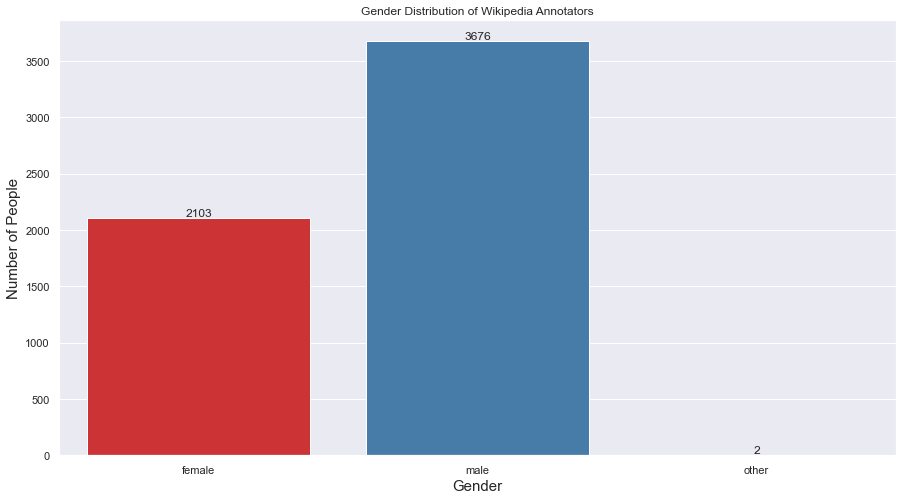

In [25]:
#counting per all genders
print(df.pivot_table(columns=['gender'], aggfunc='size'))

#graphing
plt.figure(figsize = (15,8))

sns.set_theme(style="darkgrid")
ax = sns.countplot(x='gender',palette="Set1", data=df)

abs_values = df['gender'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0])

#labels for accessibility
ax.set_title("Gender Distribution of Wikipedia Annotators")
ax.set_xlabel("Gender", fontsize = 15)
ax.set_ylabel("Number of People", fontsize = 15)

plt.savefig('a2graphics/genderdemographics.png')

### Q1 - Answer

There are more men, 3676, than there are women, 2103, as represented in the above graphic. There are also two people who are nonbinary or recorded as other that are found in the demographic data set.

### Q2 - Process
What is the distribution of the workers by first language?

In [26]:
df.loc[(df.english_first_language == '0'), 'english_first_language'] = 'English is Not First Language'
df.loc[(df.english_first_language == '1'), 'english_first_language'] = 'English is First Language'

In [27]:
df.head()

,worker_id,gender,english_first_language,age_group,education,dataset,unique_id
0,85,female,English is Not First Language,18-30,bachelors,toxicity,1
1,1617,female,English is Not First Language,45-60,bachelors,toxicity,2
2,1394,female,English is Not First Language,,bachelors,toxicity,3
3,311,male,English is Not First Language,30-45,bachelors,toxicity,4
4,1980,male,English is Not First Language,45-60,masters,toxicity,5


english_first_language
English is First Language        1068
English is Not First Language    4713
dtype: int64


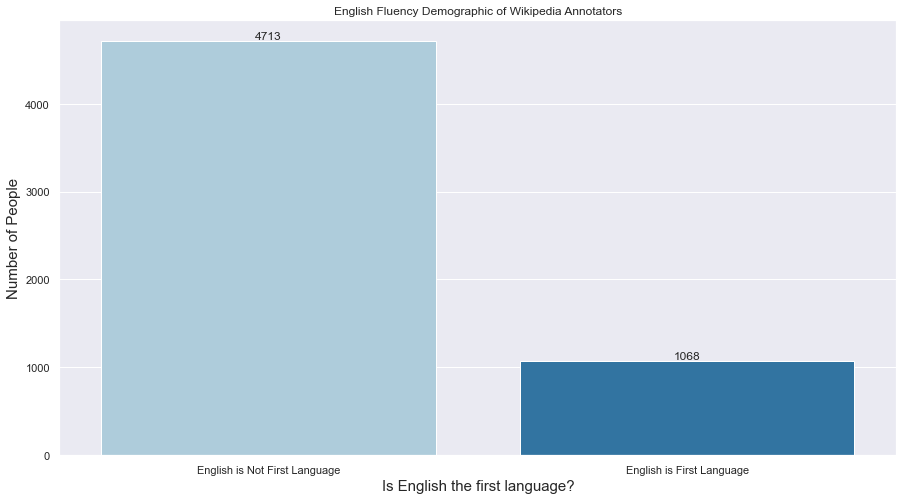

In [28]:
#Does not translate english fluency to binary in documentation.
#Assumption that 0 is not fluent, 1 is fluent

#create a graph first to determine range of variables
plt.figure(figsize = (15,8))
ax = sns.countplot(x='english_first_language', palette="Paired", data=df)

ax.set_title("English Fluency Demographic of Wikipedia Annotators")
ax.set_ylabel("Number of People", fontsize = 15)
ax.set_xlabel("Is English the first language?", fontsize = 15)

abs_values = df['english_first_language'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0])

plt.savefig('a2graphics/englishfirstlanguage.png')

#exact number for legibility
print(df.pivot_table(columns=['english_first_language'], aggfunc='size'))

### Q2 - Answer

Please note that this answer assumes that 0 represents those who do not speak English. This assumption is not validated by the documentation but instead borrows from 0 being referred to as false in computer science methods.

There are more workers who do not speak English as a first language. The ratio of ESL (*english as a second language*) is more than 4 times those who grew up speaking English, 4713 ESL compared to 1068 English native.

### Q3 - Process
What is the distribution of these workers by age group?

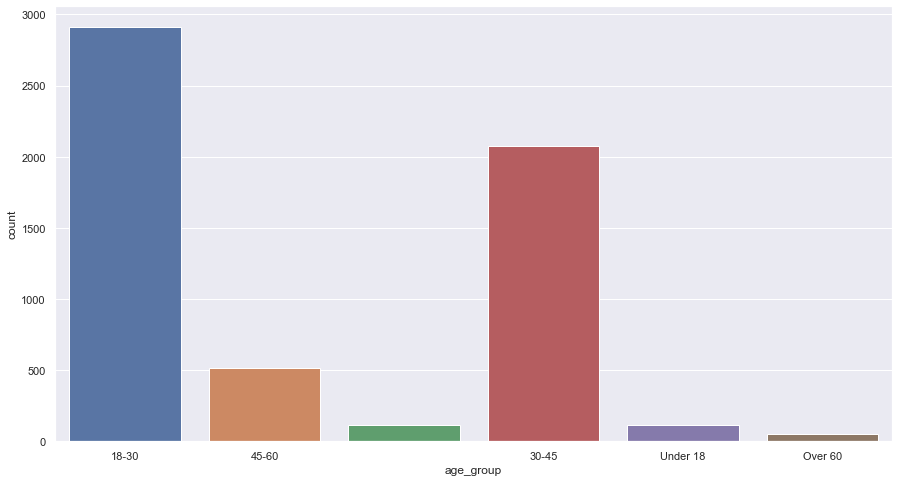

In [29]:
#graph first to understand distribution
plt.figure(figsize = (15,8))
ax = sns.countplot(x='age_group', data=df)

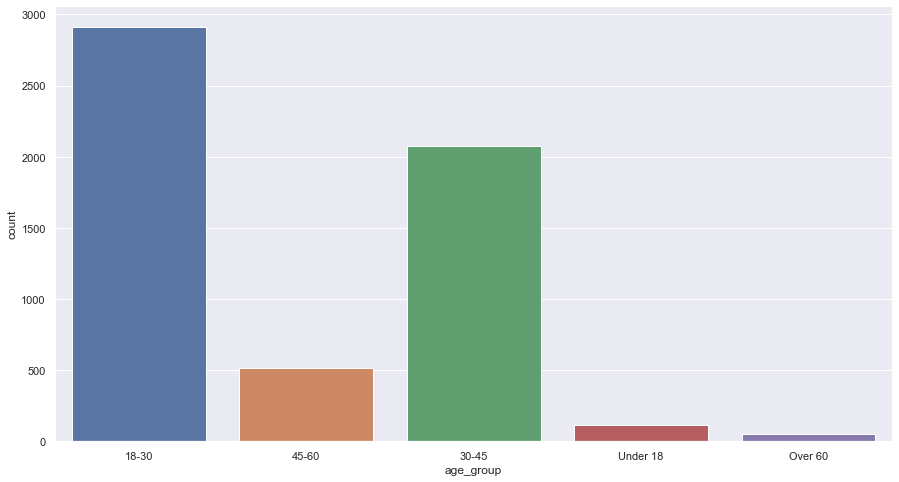

In [30]:
#get rid of null responses
#filter by responses that are empty string
cubert = df[df['age_group'] != '']
#sample head
cubert.head()
#check with graph to avoid adverse results
plt.figure(figsize = (15,8))
ax = sns.countplot(x='age_group', data=cubert)

age_group
18-30       2911
30-45       2078
45-60        514
Over 60       50
Under 18     116
dtype: int64


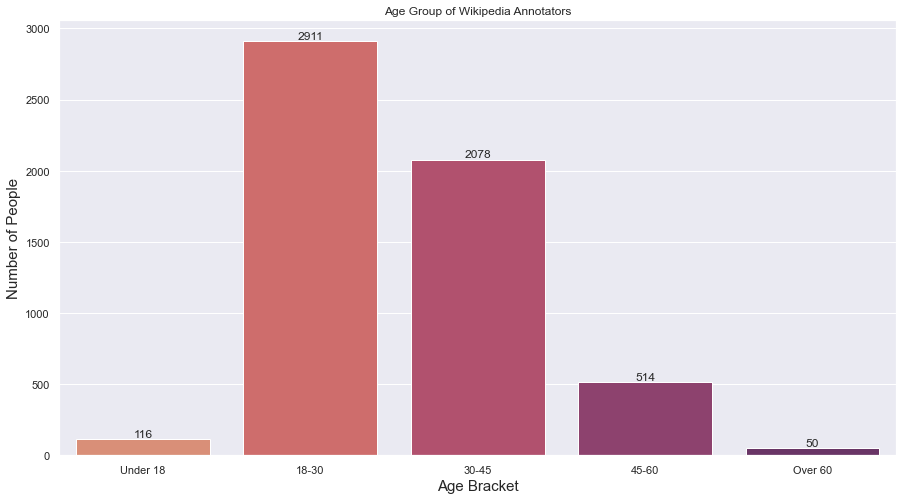

In [31]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='age_group', 
                   order=['Under 18', '18-30', '30-45', '45-60', 'Over 60'], palette="flare",
                   data=cubert)
ax.set_title("Age Group of Wikipedia Annotators")
ax.set_ylabel("Number of People", fontsize = 15)
ax.set_xlabel("Age Bracket", fontsize = 15)

abs_values = df['age_group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0])

plt.savefig('a2graphics/agegroupdemographics.png')

print(cubert.pivot_table(columns=['age_group'], aggfunc='size'))

### Q3 - Answer

The greatest representation in our dataset are those between ages 18-30. As the demographic gets older, we have a smaller representation but still significant amount of people falling between 30-45. While there are less than 500 individuals between 45-60, they outnumber those under 18 and over 60 combined.

### Q4 - Process

what is the distribution of these workers by education level?

In [32]:
#change name from some to some hs for better transparency via docs
df = df.replace(['some'], 'some hs')

#count to make sure it's right
print(df.pivot_table(columns=['education'], aggfunc='size'))

education
bachelors       2303
doctorate         61
hs              1657
masters          931
none               4
professional     684
some hs          141
dtype: int64


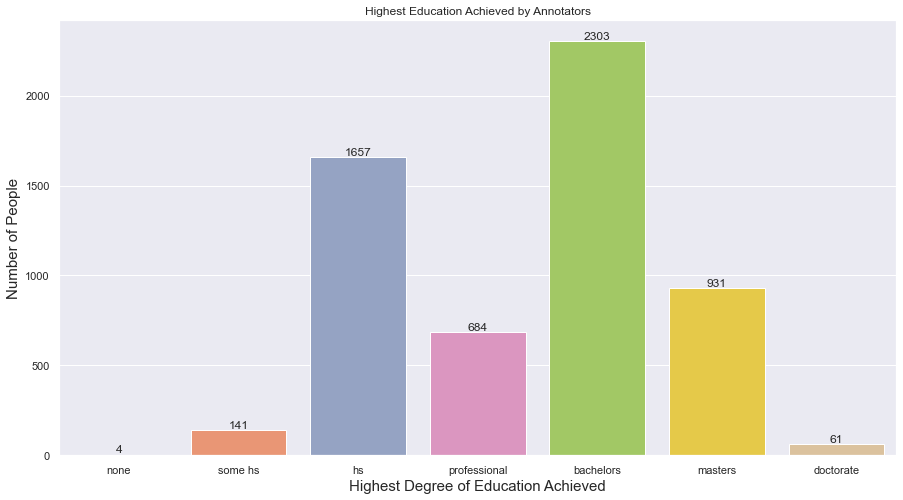

In [33]:
plt.figure(figsize = (15,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='education', palette="Set2",
                   order = ['none', 'some hs', 'hs', 'professional',
                           'bachelors', 'masters', 'doctorate'],
                   data=df)

abs_values = df['education'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0])
ax.set_title("Highest Education Achieved by Annotators")
ax.set_ylabel("Number of People", fontsize = 15)
ax.set_xlabel("Highest Degree of Education Achieved", fontsize = 15)
plt.savefig('a2graphics/educationdemographics.png')

### Q4 - Answer

The largest representation comes are those who completed a bachelors program followed by those who completed a high school program. The lowest counts of education groups in ascending order are no education, doctorate level education, and some high school.

### 2.2 Questions 5-8

Each of the next four questions requires a different kinds of answer.

Questions 5 and 6 have a "correct" answer, but we'll still give you credit for the "incorrect" answer as long as you document your process well (in Markdown, in this notebook). These questions are intended to get you thinking about how even small errors in data processing can create bias in your data.

Question 6 requires you to re-run some (but not all) of the data processing steps you performed above. Do this by copying the code into NEW cells below this line, and make sure to document each step using Markdown cells or inline (#) comments. You will probably want to change the names of the variables too.

- **Q5.** Analyze all_annotators in Sheets or Jupyter: Do any of the fields in this dataset have missing data? If so, which fields, and what % of the rows contain missing values?
- **Q6.** Build a version of the all_annotators dataset *without removing duplicates*, then re-run the summary statistics from questions 1-4. How have these summary statistics changed?

Questions 7 and 8 don't have one "correct" answer. These questions are intended to get you thinking about how using this dataset to train a machine learning model might lead to bias in the way that model performs when used as intended. You will need to provide a written answer to each of these questions in 3-4 full sentences. Consider what you know about the workers themselves, the task they were given, and about the purpose of the Perspective API.

Question 7 requires you to do some research of your own (hint: use Google). Question 8 doesn't require any new analysis or research, just critical thinking.

- **Q7.** In general, how do the demographics of these workers compare to those of English-speaking internet users overall? Why would it matter if the worker demographics don't match the demographics of the intended end users of the Perspective API?

- **Q8.** Given what you now know about the Wikipedia Talk Corpus, what issues might arise if it was used to train a machine learning-driven "hostile speech detector" that could be used on any website or social media platform?


**POST YOUR ANSWERS TO QUESTIONS 5-8 HERE.**

Please use *control f* to find the right q-series question.

### Q5 - Process

Analyze all_annotators in Sheets or Jupyter: Do any of the fields in this dataset have missing data? If so, which fields and what % of the rows contain missing values?

In [34]:
#create new variable
pdall = pd.DataFrame(all_annotators)
pdall.head()

,worker_id,gender,english_first_language,age_group,education,dataset,unique_id
0,85,female,0,18-30,bachelors,toxicity,1
1,1617,female,0,45-60,bachelors,toxicity,2
2,1394,female,0,,bachelors,toxicity,3
3,311,male,0,30-45,bachelors,toxicity,4
4,1980,male,0,45-60,masters,toxicity,5


In [35]:
len(pdall)

5781

In [36]:
#holding list variable for key
daily = []
#holding list for empty columns, check if any have empty strings
empcol = pdall.columns[pdall.eq('').any()].tolist()
#check if any empty values
empcol += pdall.columns[pdall.isnull().any()].tolist()

#iterate through rows of the dataframe
for i, row in pdall.iterrows():
    #if the row is empty or has an empty string
    if row.isnull().values.any() or row.eq('').values.any():
        #append the index location
        daily.append(i)

#print check
print(empcol)
        
len(daily)
#create a random sample to check
daily_sample = random.sample(daily, 5)

for i in daily_sample:
    print(pdall.loc[i])

['age_group']
worker_id                      2040
gender                       female
english_first_language            0
age_group                          
education                 bachelors
dataset                    toxicity
unique_id                      2498
Name: 2497, dtype: object
worker_id                     4010
gender                        male
english_first_language           0
age_group                         
education                  masters
dataset                   toxicity
unique_id                      396
Name: 395, dtype: object
worker_id                       523
gender                       female
english_first_language            0
age_group                          
education                 bachelors
dataset                    toxicity
unique_id                      2818
Name: 2817, dtype: object
worker_id                     2015
gender                        male
english_first_language           0
age_group                         
education           

In [37]:
#mathparty
percempty = round((len(daily) / len(pdall)), 2)
print(percempty)

0.02


### Q5 - Answer

An estimated 2% of the rows of the dataset have empty values within them. All of these empty values come from the age-group category.

### Q6 - Process

Build a version of the all_annotators dataset *without removing duplicates*, then re-run the summary statistics from questions 1-4. How have these summary statistics changed?

In [38]:
#toxicity_annotators, attack_annotators, aggression_annotators
allnoclean = pd.read_csv('annotationdatasets/aggression_worker_demographics.tsv', sep='\t')
allnoclean = allnoclean.append(pd.read_csv('annotationdatasets/attack_worker_demographics.tsv', sep='\t'), ignore_index=True)
allnoclean = allnoclean.append(pd.read_csv('annotationdatasets/toxicity_worker_demographics.tsv', sep='\t'), ignore_index=True)

In [39]:
allnoclean.head()
print(len(allnoclean))

7971


In [40]:
#Gender
print('RAW')
print(allnoclean.pivot_table(columns=['gender'], aggfunc='size'))
print('CLEANED')
print(df.pivot_table(columns=['gender'], aggfunc='size'))

RAW
gender
female    2943
male      5025
other        3
dtype: int64
CLEANED
gender
female    2103
male      3676
other        2
dtype: int64


In [41]:
#Age Group
print('RAW')
print(allnoclean.pivot_table(columns=['age_group'], aggfunc='size'))
print('CLEANED')
print(df.pivot_table(columns=['age_group'], aggfunc='size'))

RAW
age_group
18-30       3960
30-45       2909
45-60        732
Over 60       70
Under 18     153
dtype: int64
CLEANED
age_group
             112
18-30       2911
30-45       2078
45-60        514
Over 60       50
Under 18     116
dtype: int64


In [42]:
#Education
print('RAW')
print(allnoclean.pivot_table(columns=['education'], aggfunc='size'))
print('CLEANED')
print(df.pivot_table(columns=['education'], aggfunc='size'))

RAW
education
bachelors       3165
doctorate         81
hs              2288
masters         1316
none               5
professional     927
some             189
dtype: int64
CLEANED
education
bachelors       2303
doctorate         61
hs              1657
masters          931
none               4
professional     684
some hs          141
dtype: int64


In [43]:
#English First Language
print('RAW')
print(allnoclean.pivot_table(columns=['english_first_language'], aggfunc='size'))
print('CLEANED')
print(df.pivot_table(columns=['english_first_language'], aggfunc='size'))

RAW
english_first_language
0    6501
1    1470
dtype: int64
CLEANED
english_first_language
English is First Language        1068
English is Not First Language    4713
dtype: int64


### Q6 - Answer

In using duplicated data to make opinions about annotators demographics, we idenitfy that the makeup of existing fields per each column did not increase proportionately and instead suggest a more exponential growth. The larger categories had encountered larger growth when using unclean data. Their smaller counterparts would increase only a fraction more.
-**Gender - Input 47** Men increased by nearly 1500 using unclean data, women increased by 800
-**Age Group - Input 48** 18-30 demographic increased by about 1000 with unclear data, those over 60 increased by 20.
-**Education - Input 49** Those with a bachelors degree increased by about 800, those without any education increased by 1.
-**English as a first language - Input 50** Those who grew up speaking English increased by 400, those who did not increased by nearly 2000. *Note that in the original dataset, 0 is for those who do not speak English, 1 represents those who do.*

### Please note the difference in our age group data.
In our cleaned age bracket data we found multiple rows with an empty value. This shows up in our counting function, with 112 people being recorded to have no age group. This source of error does not exist in the original datasets, suggesting that somewhere in the cleaning process our age-data gets mistranslated.

### Q7. - Answer
In general, how do the demographics of these workers compare to those of English-speaking internet users overall? Why would it matter if the worker demographics don't match the demographics of the intended end users of the Perspective API?

Our dataset has a proportion of English native to non English natives of about 1:4.18. If the demographics of annotators don't represent the people who compose the dataset, then they can overestimate or miss cultural-specific references that would increase the accuracy. Specific acronyms, infrequently mentioned words, and appropriation of words could be used to insult others that the annotator might be unable to catch due to their infamiliarity with those terms. In addition, cultural specific pages that talk about sensitive content could also be caught as hostile or toxic just due to the cultural bias of the annotators.

### Q8. - Answer

Given what you now know about the Wikipedia Talk Corpus, what issues might arise if it was used to train a machine learning-driven "hostile speech detector" that could be used on any website or social media platform?

The machine-learning algorithm would likely reflect someone who speaks English as a second lanugage. It would have an okay understanding of the text with blind spots towards content more pertinent to the English language. 

The authors of the original dataset and the associated paper explain that they used sampled comments intermingled with the randomly collected dataset to ascertain annotator accuracy. However, it makes me wonder how many of those comments were tested on culturally-sensitive topics.

There's a lot of issues with an English oriented hostile speech detector trained with non-English speaking annotators.

Certain topics could be missed:
- Abbreviations
- [Leetspeak](https://techterms.com/definition/leet#:~:text=Leet%2C%20or%20leetspeak%2C%20is%20a,symbols%20that%20closely%20resemble%20them.)
- Slurs

In addition with an overannunciation of men and 18-30 year olds various topics could be reappropriated to reference only negative connotations.
- Cross-culturally sensitive topics, e.g. lgbt, women's health

This machine learning platform was only trained using wikipedia data. While there certainly probably lies annotator bias, I also think the speech structure would be completely different within other social media context. Where the context of Wikipedia comments revolve around the usefulness of a correction, I believe that other social media should be used discursively. An MLA to identify toxicity may do more to stifle conversation and segment audiences than encourage conversation.

## Part 3: Digging deeper

### 3.1 Questions 9-16

Below is a list of additional questions that you should be able to answer, based on what you've done today. 

***You may answer EITHER the "code" questions (Q9-Q12) OR the "no code" questions (Q13-Q16).***

If you don't feel very comfortable with Python yet, choose the "no code" questions.

- ***For the "code" questions*** you will need to load ``toxicity_annotations.tsv`` into Python and join that dataset with ``all_annotators`` on ``worker_id``.
- ***For the "no code" questions*** you will need to load the file ``toxicity_labelled_comments_3k_sample.csv`` into Google Sheets. This file contains the text of 3000 comments that were annotated for toxicity, as well as the toxicity score that each worker gave to these comments. The file is a random sample taken from the ~1.5 million comments contained in ``toxicity_annotated_comments.tsv``

*Note:* answering question 13-16 below ***will require reading some comments that contain offensive speech!*** If you do not want to be exposed to offensive speech, either answer the "code" questions instead, or reach out to your Instructor or TA and ask for an alternate activity.

#### Code questions
- **Q9.** What % of *workers* who labelled the toxicity dataset do we have demographic data for?
- **Q10.** What % of the *comments* in the toxicity dataset were labelled by male vs. female-identified workers?
- **Q11.** What % of the *comments* in the toxicity dataset were labelled by people for whom English is NOT their first language?
- **Q12.** Based on your findings from questions 9-11, how might this dataset present a biased view of "toxicity"? How would you expect such biases to impact how the Perspective API performs? 

#### No-code questions

Before you answer the questions below, read through at least 20 comments from ``toxicity_labelled_comments_3k_sample.csv`` that were labelled "toxic" (-1 or -2), 20 that were labelled "non-toxic" (1 or 2), and 20 that are labelled "neutral" (0). Note in your spreadsheet whether you agree or disagree with the labeller's judgement. 


- **Q13.** Pick 2-3 examples of comments where you disagreed with the labeller about the toxicity of a comment. Why did you disagree? Why do you think that the labeller might have labelled these comments the way they did?
- **Q14.** Pick 2-3 examples of comments where you don't understand what the commenter was saying, and therefore had a hard time classifying as toxic or non-toxic. What additional context or information would you need in order to be confident in your judgement about the toxicity of this comment?
- **Q15.** Read through the [instructions and labelling options](https://github.com/ewulczyn/wiki-detox/blob/master/src/modeling/toxicity_question.png) given to the crowdworkers. How could the way these instructions were written have made it difficult for crowdworkers to accurately label comments as toxic or non-toxic? If you were going to run a labelling campaign like this one yourself, how would you change these instructions or labelling options to help the crowdworkers make more accurate or consistent judgements about toxicity?
- **Q16.** Based on your findings from questions 13-15, how might this dataset present a biased view of "toxicity"? How would you expect such biases to impact how the Perspective API performs as a general-purpose hostile speech detector? 

**POST YOUR ANSWERS TO QUESTIONS 9-16 HERE.**

Please use *control f* to find the right q-series question.

### Q9 - Process

What % of workers who labelled the toxicity dataset do we have demographic data for?

In [44]:
#load the csv file
toxic = pd.read_csv('annotationdatasets/toxicity_annotations.tsv', sep='\t')

In [45]:
#length of document
print(len(toxic))

1598289


In [46]:
#check to see if it loaded right
toxic.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


In [47]:
#compare with other dataset
df.head()

,worker_id,gender,english_first_language,age_group,education,dataset,unique_id
0,85,female,English is Not First Language,18-30,bachelors,toxicity,1
1,1617,female,English is Not First Language,45-60,bachelors,toxicity,2
2,1394,female,English is Not First Language,,bachelors,toxicity,3
3,311,male,English is Not First Language,30-45,bachelors,toxicity,4
4,1980,male,English is Not First Language,45-60,masters,toxicity,5


In [48]:
#make worker_id an int
df['worker_id']=df['worker_id'].astype(int)

In [49]:
#make toxic worker_id an int
toxic['worker_id'] = toxic['worker_id'].astype(int)

In [50]:
#filter df to only include toxicity dataset or else file size will increase
toxicdf = df[df['dataset'] == 'toxicity']

In [51]:
toxicdf.tail()

,worker_id,gender,english_first_language,age_group,education,dataset,unique_id
3586,3189,female,English is Not First Language,18-30,bachelors,toxicity,3587
3587,1105,female,English is Not First Language,18-30,bachelors,toxicity,3588
3588,2192,female,English is First Language,Under 18,hs,toxicity,3589
3589,2692,female,English is Not First Language,30-45,hs,toxicity,3590
3590,4160,male,English is Not First Language,45-60,bachelors,toxicity,3591


In [52]:
combinedtoxic= toxic.merge(toxicdf, how='left')

In [53]:
combinedtoxic.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education,dataset,unique_id
0,2232.0,723,0,0.0,female,English is Not First Language,30-45,bachelors,toxicity,1058
1,2232.0,4000,0,0.0,male,English is First Language,18-30,hs,toxicity,3104
2,2232.0,3989,0,1.0,female,English is Not First Language,18-30,bachelors,toxicity,2960
3,2232.0,3341,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2232.0,1574,0,1.0,female,English is Not First Language,30-45,bachelors,toxicity,544


In [54]:
combinedtoxic.tail()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education,dataset,unique_id
1598284,699897151.0,1550,0,0.0,male,English is Not First Language,18-30,professional,toxicity,40
1598285,699897151.0,1025,0,1.0,female,English is Not First Language,18-30,professional,toxicity,633
1598286,699897151.0,648,0,1.0,male,English is Not First Language,18-30,hs,toxicity,1770
1598287,699897151.0,379,0,0.0,male,English is Not First Language,18-30,hs,toxicity,437
1598288,699897151.0,468,0,1.0,female,English is Not First Language,30-45,bachelors,toxicity,294


In [55]:
print(len(combinedtoxic))

1598289


In [56]:
print(combinedtoxic.isnull().sum())

rev_id                         0
worker_id                      0
toxicity                       0
toxicity_score                 0
gender                    251334
english_first_language    251334
age_group                 251334
education                 251334
dataset                   251334
unique_id                 251334
dtype: int64


In [57]:
print(round((251334/1598289),2))

0.16


### Q9 - Answer

16% of the recorded rows don't have demographic data.

### Q10 - Process

What % of the comments in the toxicity dataset were labelled by male vs. female-identified workers?

In [60]:
combinedtoxic['gender'].value_counts()

male      889251
female    457346
other        358
Name: gender, dtype: int64

In [62]:
print(round(889251/1598289, 2))

0.56


In [63]:
print(round(457346/1598289, 2))

0.29


### Q10 - Answer

Of the datasets available we know that at least 56% of comments are annotated by men and 29% of comments are annotated by women.

### Q11 - Process

What % of the comments in the toxicity dataset were labelled by people for whom English is NOT their first language?

In [65]:
combinedtoxic['english_first_language'].value_counts()

English is Not First Language    1113162
English is First Language         233793
Name: english_first_language, dtype: int64

In [66]:
print(round(1113162/1598289, 2))

0.7


### Q11 - Answer

Of the dataset, we find that at least 70% of the annotators do not speak English as a first language.

### Q12 - Answer

Based on your findings from questions 9-11, how might this dataset present a biased view of "toxicity"? How would you expect such biases to impact how the Perspective API performs?

These findings should be reemphasized that they are lower bounds. From the datasets available we have 16% of demographic information unavailable although it is suggested that it would it only add to the majority demographic groups. 

I believe that the viewpoint biases may be unable to correctly ascertain what could be characterized as toxic or antagonizing comments. There's so many different references or idioms like dim or trash that ESL individuals might be contextually unable to recognize. Additionally the skewed male bias, could normalize sexist behavior as applied to women. It doesn't help that the authors who wrote the criteria for toxicitiy are men and may not have employed women for accuracy assessment samples when vetting the annotator recruitment process.

### 3.2 Challenge questions (optional)

The questions below are optional; you don't need to answer them to receive full credit for this assignment.

If you'd like to explore additional analyses of this dataset, here are a few questions to get you started!

- ***Challenge #1.*** Are female-identified workers more likely to label a comment as "toxic" than male identified workers? 
- ***Challenge #2.*** Are workers with a higher level of education more consistent in their "toxicity" labelling--in other words, do they tend to agree with other labellers more often? (remember that, according to the documentation, every comment was labelled by at least 10 crowdworkers). 
- ***Challenge #3.*** What are the words most frequently associated with toxic comments? (perhaps focus on comments where most or all of the workers agree are toxic)
- ***Challenge #4.*** What are the most polarizing comments--comments that some workers consider toxic, and others consider non-toxic? What about these comments made them so polarizing, or hard to classify?
- ***Challenge #5.*** Answer some or all of the homework questions above for one the other datasets ("attack" and "aggressive"). How are the potential sources of bias for these datasets the same, or different, than for the toxicity dataset? Would you "trust" a machine learning model based on these datasets more or less than one trained on the "toxicity" dataset? Why?

*OPTIONAL: POST YOUR ANSWERS TO THE CHALLENGE QUESTIONS HERE.*

Use both Markdown and code-formatted cells.